 # CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING 

# IMPORT LIBRARIES

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


pandas → used to load and manipulate datasets.

matplotlib → used to create graphs and visualizations.

StandardScaler → scales numerical data so all features are treated equally.

KMeans → machine learning algorithm used for clustering.

# LOAD DATASET

In [40]:
import pandas as pd

df = pd.read_csv("customer_dataset_1000.csv")
df.head()


,CustomerID,Age,Annual_Income,Spending_Score
0,1,56,125186,58
1,2,69,54674,67
2,3,46,55854,56
3,4,32,66271,40
4,5,60,93688,98


Loads the dataset from a CSV file.

df.head() displays the first five rows so we can confirm the data is loaded correctly.

# BASIC INFO AND MISSING VALUES

In [41]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.81900,84905.976000,49.466000
std,288.819436,14.99103,38430.889006,29.137911
min,1.000000,18.00000,20060.000000,1.000000
25%,250.750000,31.00000,51945.500000,24.000000
50%,500.500000,44.00000,84699.000000,48.000000
75%,750.250000,56.00000,117858.000000,75.000000
max,1000.000000,69.00000,149972.000000,100.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      1000 non-null   int64
 1   Age             1000 non-null   int64
 2   Annual_Income   1000 non-null   int64
 3   Spending_Score  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [43]:
df.isnull().sum()

CustomerID        0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

# SELECT FEATURES

In [44]:
features = df[['Age', 'Annual_Income', 'Spending_Score']].copy()
features.head()


,Age,Annual_Income,Spending_Score
0,56,125186,58
1,69,54674,67
2,46,55854,56
3,32,66271,40
4,60,93688,98


Age → helps identify customer lifecycle stage

Annual Income → ability to spend

Spending Score → behavior-based spending indicator

In [45]:
features = features.dropna()
features.shape


(1000, 3)

# SCALE THE DATA

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


Clustering algorithms work best when numerical values are on the same scale.
Scaling ensures:

Age (0–100)

Income (30k–150k)

Spending Score (1–100)

# ELBOW METHOD — FIND OPTIMAL K

In [47]:
wcss = []
for i in range(1, 11):
    km= KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(scaled_data)                        #your scaled dataset
    wcss.append(km.inertia_)



WCSS (Within Cluster Sum of Squares) measures cluster compactness.
We run KMeans for K = 1 to 10 and store each model’s WCSS.

Lower WCSS = tighter clusters.
But increasing K always lowers WCSS — so we need a method to find the “bend.”

# PLOT ELBOW CURVE

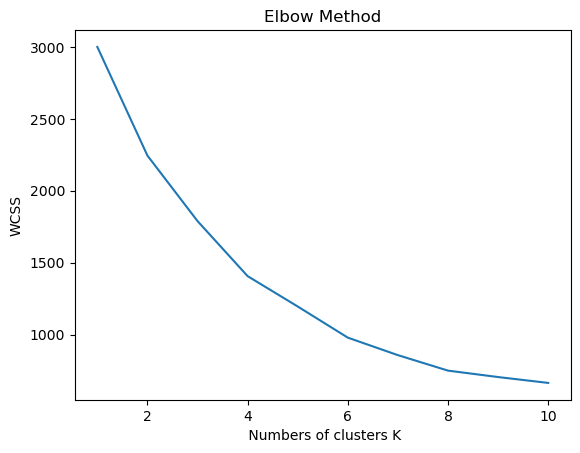

In [48]:
plt.plot(range(1, len(wcss)+1), wcss)
plt.title("Elbow Method")
plt.xlabel(" Numbers of clusters K")
plt.ylabel("WCSS")
plt.show()



The elbow graph helps identify the best number of clusters.
At the “bend” or “elbow point,” adding more clusters does not improve WCSS significantly.

In your dataset, K = 4 is the optimal value.

In [49]:
df.columns

Index(['CustomerID', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [50]:
K=4

# TRAIN FINAL K-MEANS MODEL (K = 4)

In [51]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

labels = kmeans.labels_

We train the final segmentation model using 4 clusters.
labels contains the cluster number (0, 1, 2, 3) for each customer.

In [52]:
df['Cluster'] = labels


# ADD CLUSTER LABELS TO DATAFRAME

In [53]:
df.groupby('Cluster').mean()


,CustomerID,Age,Annual_Income,Spending_Score
Cluster,,,,
0,493.326087,57.639130,63245.086957,69.943478
1,511.213740,32.801527,50163.645038,36.610687
2,473.755556,33.426667,113867.573333,74.342222
3,517.674912,51.049470,111648.505300,24.946996


We add a new column called Cluster to the dataset.
Now every customer belongs to one of four segments.

This helps us analyze customer groups later.

In [54]:
df.head()


,CustomerID,Age,Annual_Income,Spending_Score,Cluster
0,1,56,125186,58,3
1,2,69,54674,67,0
2,3,46,55854,56,0
3,4,32,66271,40,1
4,5,60,93688,98,0


# CLUSTER SUMMARY

In [55]:
df[['Age', 'Annual_Income', 'Spending_Score']].mean()


Age                  43.819
Annual_Income     84905.976
Spending_Score       49.466
dtype: float64

This generates the average Age, Income, and Spending Score for each cluster.
It helps understand the customer persona of each group, such as:

High-income high spenders

Young budget customers

Older low spenders

In [56]:
summary = pd.DataFrame({
    'Average Age': [df['Age'].mean()],
    'Average Income': [df['Annual_Income'].mean()],
    'Average Spending Score': [df['Spending_Score'].mean()]
})

summary


,Average Age,Average Income,Average Spending Score
0,43.819,84905.976,49.466


# DATA VISUALIZATION (ALL GRAPHS)

# Age Distribution of Customers


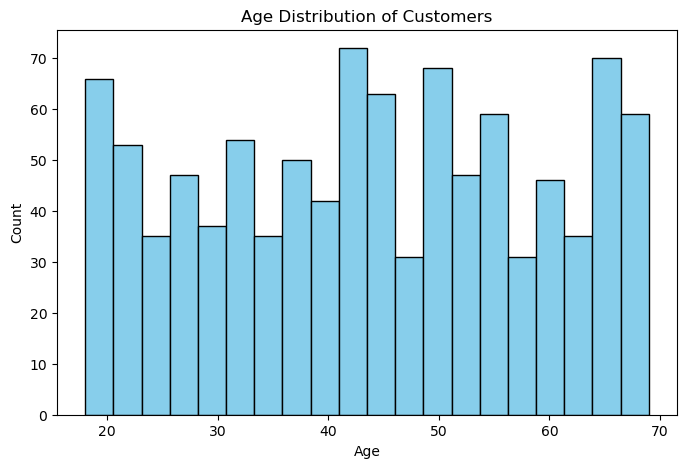

In [57]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Shows which age range has the most customers.

# Annual Income Distribution

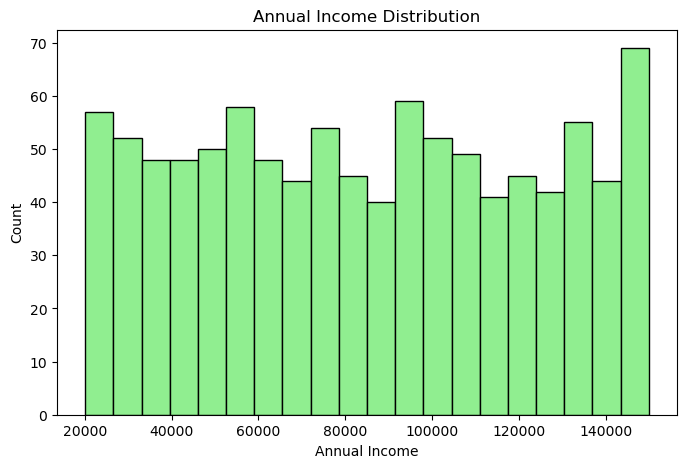

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df['Annual_Income'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()


Helps see how many customers are low-, mid-, or high-income.

# Spending Score Distribution

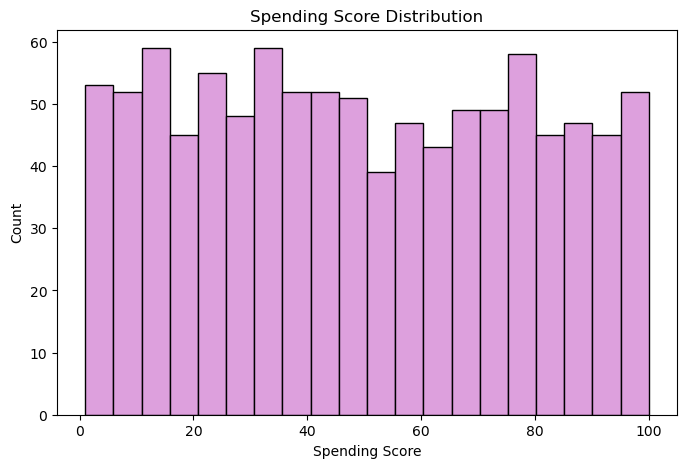

In [59]:
plt.figure(figsize=(8,5))
plt.hist(df['Spending_Score'], bins=20, color='plum', edgecolor='black')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()


Shows spending behavior of the store's customer base.

# Number of Customers in Each Cluster

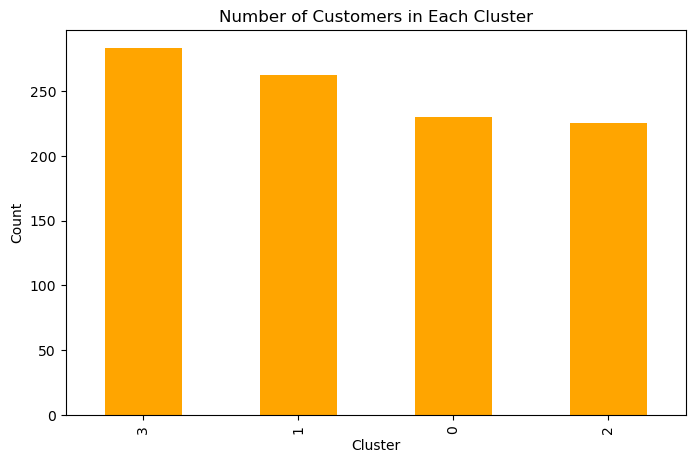

In [60]:
plt.figure(figsize=(8,5))
df['Cluster'].value_counts().plot(kind='bar', color='orange')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


Shows how many customers belong in each segment.

# Customer Segments: Income vs Spending Score

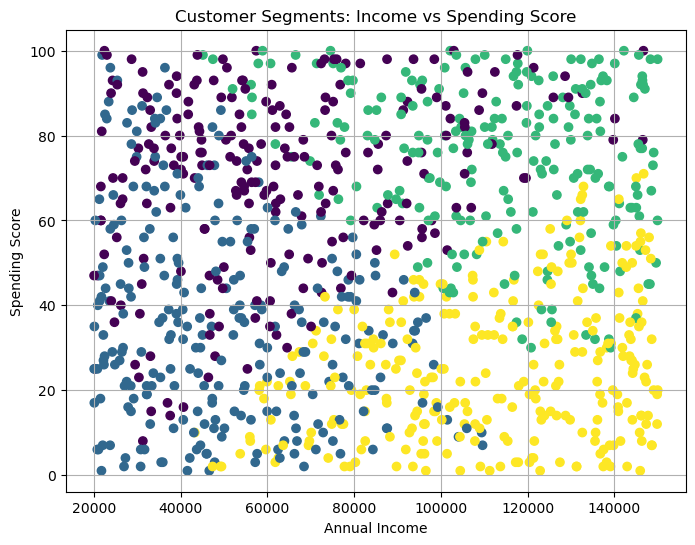

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
plt.title("Customer Segments: Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()


Visualizes purchasing power across segments.

# Customer Segments: Age vs Spending Score

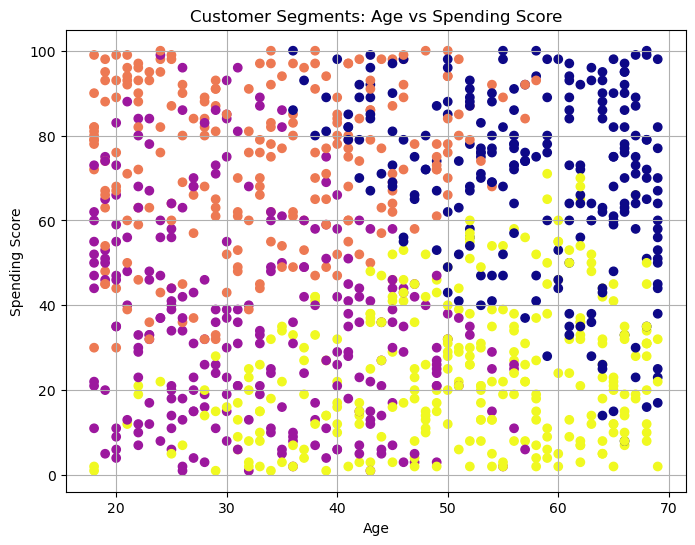

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Spending_Score'], c=df['Cluster'], cmap='plasma')
plt.title("Customer Segments: Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()


Shows how age affects spending behavior.

# conclusions

The K-Means clustering model successfully segmented customers into four distinct groups based on Age, Annual Income, and Spending Score.
The segmentation revealed meaningful patterns:

 Cluster 0 — Mid-Age, High Spenders
 These customers are consistent buyers with high spending power.

 Cluster 1 — Young, Low Income, Low Spending
 These customers are less engaged and price-sensitive.

 Cluster 2 — Young, High Income, High Spending (Premium Segment)
 These are the most valuable customers — high income and high spending.

 Cluster 3 — Older, High Income, Low Spending
 These customers have spending ability but low engagement.

 K-Means clustering helped discover behavioral patterns that businesses can use to improve marketing, customer experience, and revenue effectiveness.

# Recommendations

Cluster 0 — Mid-Age High Spenders
 Strategy: Retain & Upsell
 
-Offer loyalty benefits

-Introduce premium product 

-Provide reward points to maintain engagement

 Cluster 1 — Young, Low-Income, Low Spenders
 Strategy: Increase engagement with affordable offers

-Provide discounts and seasonal sales

-Introduce budget-friendly subscription plans

-Target with social media campaigns

 Cluster 2 — Young High-Income Heavy Spenders
 Strategy: VIP Experience

-Exclusive access to premium products Personalized 

-Priority customer service

-Early access to new launches

 Cluster 3 — Older High-Income Low Spenders
 Strategy: Re-engagement & Awareness
 
-Email campaigns highlighting product value

-Free trial programs or sample kits

-Personalized offers based on past purchases

# SAVE SEGMENTED DATASET

In [63]:
df.to_csv("customer_segments.csv", index=False)


dataset containing:

Original features

Cluster labels

Any additional columns